## Plot results of mutation detection experiments

#### For now, we are running mutation detection experiments for the below genes (TP53, PTEN, PIK3CA, KRAS, TTN) for comparison with the figures in the BioBombe manuscript.

#### This gives a diversity of prediction difficulties (e.g. TP53 is fairly easy to predict, TTN is used as a negative control ,etc) but eventually we can run this for all of the top 50 mutated genes in TCGA.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import config as cfg
%matplotlib inline

In [2]:
genes = ['TP53', 'PTEN', 'PIK3CA', 'KRAS', 'TTN']
results_dir = os.path.join(cfg.repo_root, 'results', 'canonical_pathways', 'mutation')
df = None
raw_df = None
for gene_name in genes:
    results_file = os.path.join(os.path.abspath(results_dir),
                                gene_name,
                                '{}_classify_metrics.tsv.gz'.format(gene_name))
    results_df = pd.read_csv(results_file, sep='\t')
    if df is None:
        df = results_df
    else:
        df = pd.concat((df, results_df))
    raw_file = os.path.join(os.path.abspath(results_dir),
                            gene_name,
                            '{}_raw_classify_metrics.tsv.gz'.format(gene_name))
    raw_file_df = pd.read_csv(raw_file, sep='\t')
    if raw_df is None:
        raw_df = raw_file_df
    else:
        raw_df = pd.concat((raw_df, raw_file_df))
df = df[df['data_type'] == 'cv']
raw_df = raw_df[raw_df['data_type'] == 'cv']
df.head(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
2,0.77987,0.75991,TP53,signal,20,671155,pca,cv
5,0.76890,0.73031,TP53,signal,20,671155,nmf,cv
8,0.75110,0.70910,TP53,signal,20,671155,plier,cv
11,0.77986,0.75987,TP53,signal,20,365838,pca,cv
14,0.76936,0.73252,TP53,signal,20,365838,nmf,cv
17,0.75028,0.70764,TP53,signal,20,365838,plier,cv
20,0.77962,0.75973,TP53,signal,20,131932,pca,cv
23,0.76943,0.73343,TP53,signal,20,131932,nmf,cv
26,0.75047,0.70770,TP53,signal,20,131932,plier,cv
29,0.77792,0.75844,TP53,signal,20,121958,pca,cv


In [3]:
raw_df.head(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
2,0.91682,0.88206,TP53,signal,8000,42,raw,cv
5,0.56873,0.52888,TP53,shuffled,8000,42,raw,cv
2,0.91707,0.74038,PTEN,signal,8000,42,raw,cv
5,0.62423,0.24805,PTEN,shuffled,8000,42,raw,cv
2,0.80211,0.61400,PIK3CA,signal,8000,42,raw,cv
5,0.52892,0.29553,PIK3CA,shuffled,8000,42,raw,cv
2,0.87120,0.73022,KRAS,signal,8000,42,raw,cv
5,0.53948,0.26645,KRAS,shuffled,8000,42,raw,cv
2,0.76751,0.66535,TTN,signal,8000,42,raw,cv
5,0.80626,0.69308,TTN,shuffled,8000,42,raw,cv


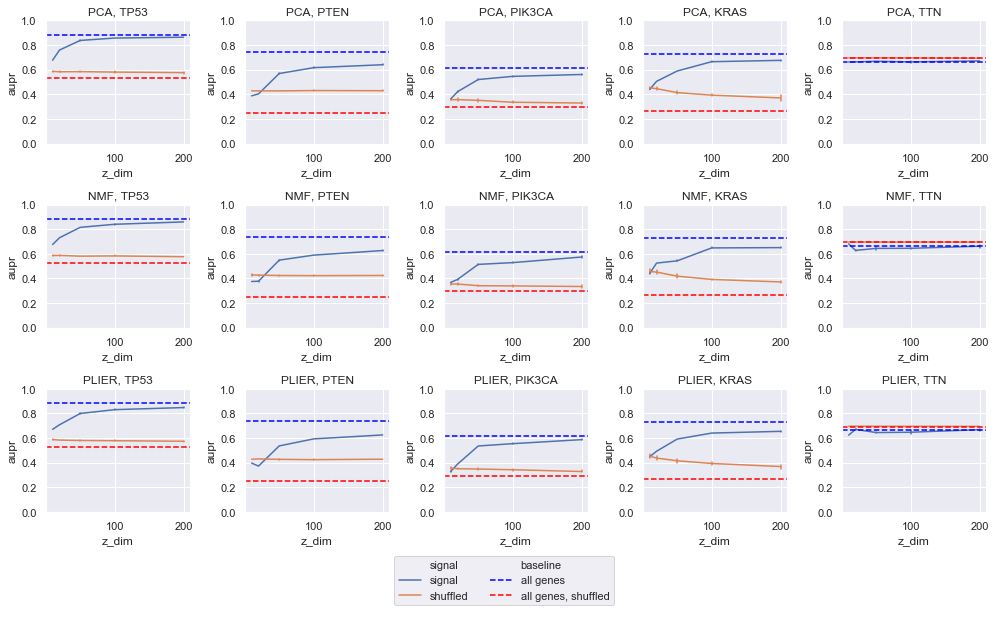

In [4]:
import warnings

sns.set()
fig, axarr = plt.subplots(3, 5)
fig.set_figwidth(14)
fig.set_figheight(9)

with warnings.catch_warnings():
    # filter deprecation warning in scipy
    warnings.filterwarnings('ignore', category=FutureWarning)
    for a_ix, alg in enumerate(['pca', 'nmf', 'plier']):
        for g_ix, gene_name in enumerate(genes):
            ax = axarr[a_ix, g_ix]
            gene_df = df[(df['gene_or_cancertype'] == gene_name) & 
                         (df['algorithm'] == alg)]
            sns.lineplot(data=gene_df, x='z_dim', y='aupr', hue='signal', 
                         err_style='bars', ax=ax)
            raw_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                              (raw_df['signal'] == 'signal')]['aupr'].values[0]
            shuffled_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                                   (raw_df['signal'] == 'shuffled')]['aupr'].values[0]
            ax.axhline(y=raw_aupr, color='blue', linestyle='--', label='all genes')
            ax.axhline(y=shuffled_aupr, color='red', linestyle='--', label='all genes, shuffled')
            ax.set_ylim((0.0, 1.0))
            if a_ix == 1 and g_ix == len(genes)-1:
                handles, labels = ax.get_legend_handles_labels()
            ax.get_legend().remove()
            ax.set_title('{}, {}'.format(alg.upper(), gene_name))
plt.tight_layout(h_pad=2)
fig.subplots_adjust(bottom=0.2)
labels.insert(3, 'baseline')
handles.insert(3, handles[0])
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.025), ncol=2)

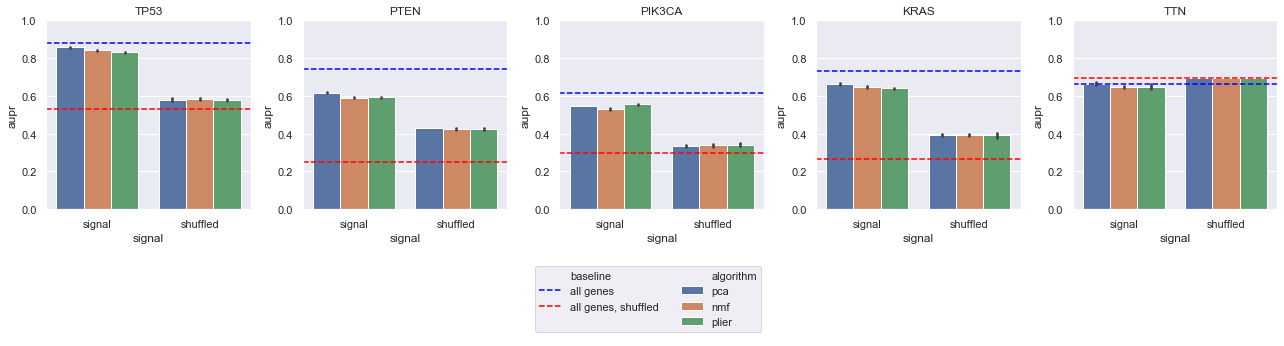

In [5]:
sns.set()
fig, axarr = plt.subplots(1, 5)
fig.set_figwidth(18)
fig.set_figheight(5)

z_dim = 100
prev_handles = handles

with warnings.catch_warnings():
    # filter deprecation warning in scipy
    warnings.filterwarnings('ignore', category=FutureWarning)
    for g_ix, gene_name in enumerate(genes):
        ax = axarr[g_ix]
        gene_df = df[(df['gene_or_cancertype'] == gene_name) & 
                     (df['z_dim'] == z_dim)]
        sns.barplot(data=gene_df, x='signal', y='aupr', hue='algorithm', ax=ax)
        raw_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                          (raw_df['signal'] == 'signal')]['aupr'].values[0]
        shuffled_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                               (raw_df['signal'] == 'shuffled')]['aupr'].values[0]
        ax.axhline(y=raw_aupr, color='blue', linestyle='--', label='all genes')
        ax.axhline(y=shuffled_aupr, color='red', linestyle='--', label='all genes, shuffled')
        ax.set_ylim((0.0, 1.0))
        if g_ix == len(genes)-1:
            handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
        ax.set_title(gene_name)
plt.tight_layout(h_pad=2)
fig.subplots_adjust(bottom=0.4)
labels.insert(0, 'baseline')
handles.insert(0, prev_handles[0])
labels.insert(3, '')
handles.insert(3, prev_handles[0])
labels.insert(4, 'algorithm')
handles.insert(4, prev_handles[0])
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.025), ncol=2)

## Plot comparison of PLIER with varying pathway datasets

All above results are with the canonical pathways dataset from MSigDB. Here, we compare this to an oncogenic pathways dataset (also from MSigDB), and a set of random pathways (see `OB.preprocess_plier_pathways.ipynb` for how these are generated).

In [6]:
df.head()

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
2,0.77987,0.75991,TP53,signal,20,671155,pca,cv
5,0.76890,0.73031,TP53,signal,20,671155,nmf,cv
8,0.75110,0.70910,TP53,signal,20,671155,plier,cv
11,0.77986,0.75987,TP53,signal,20,365838,pca,cv
14,0.76936,0.73252,TP53,signal,20,365838,nmf,cv


In [7]:
for pw_type in ['oncogenic', 'random']:
    results_dir = os.path.join(cfg.repo_root, 'results', 
                               '{}_pathways'.format(pw_type), 
                               'mutation')
    for gene_name in genes:
        results_file = os.path.join(results_dir, gene_name,
                                    '{}_classify_metrics.tsv.gz'.format(gene_name))
        pw_df = pd.read_csv(results_file, sep='\t')
        pw_df['algorithm'] = pw_df['algorithm'] + '_' + pw_type
        df = pd.concat((df, pw_df))
df.loc[df['algorithm'] == 'plier', 'algorithm'] = 'plier_canonical'
df.tail(n=10)

,auroc,aupr,gene_or_cancertype,signal,z_dim,seed,algorithm,data_type
140,0.80754,0.69630,TTN,shuffled,10,121958,plier_random,cv
141,0.80801,0.69755,TTN,shuffled,10,131932,plier_random,train
142,0.81037,0.71223,TTN,shuffled,10,131932,plier_random,test
143,0.80758,0.69593,TTN,shuffled,10,131932,plier_random,cv
144,0.80797,0.69744,TTN,shuffled,10,671155,plier_random,train
145,0.81054,0.71215,TTN,shuffled,10,671155,plier_random,test
146,0.80761,0.69597,TTN,shuffled,10,671155,plier_random,cv
147,0.80796,0.69746,TTN,shuffled,10,365838,plier_random,train
148,0.81042,0.71217,TTN,shuffled,10,365838,plier_random,test
149,0.80754,0.69571,TTN,shuffled,10,365838,plier_random,cv


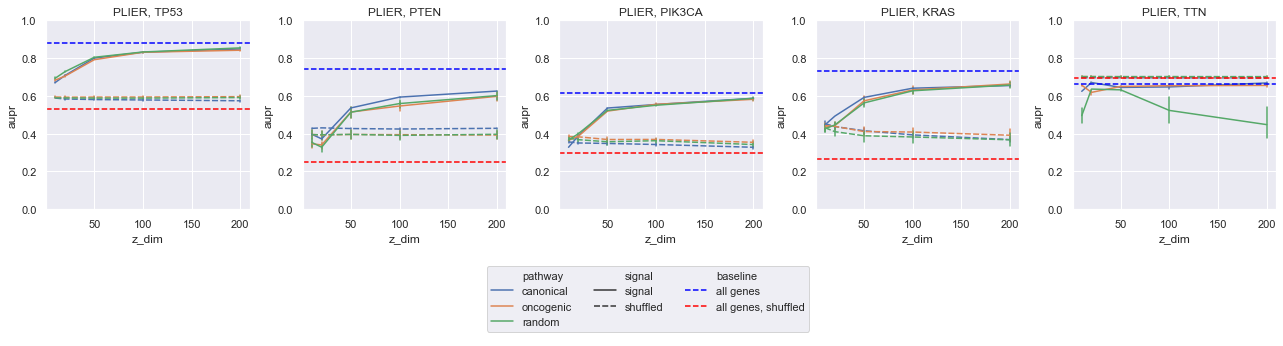

In [8]:
import warnings

sns.set()
fig, axarr = plt.subplots(1, 5)
fig.set_figwidth(18)
fig.set_figheight(5)

plier_df = df[df['algorithm'].str.contains('plier')].copy()
plier_df['pathway'] = [s.split('_')[1] for s in plier_df['algorithm'].values]
plier_df['algorithm'] = [s.split('_')[0] for s in plier_df['algorithm'].values]
with warnings.catch_warnings():
    # filter deprecation warning in scipy
    warnings.filterwarnings('ignore', category=FutureWarning)
    for g_ix, gene_name in enumerate(genes):
        ax = axarr[g_ix]
        gene_df = plier_df[plier_df['gene_or_cancertype'] == gene_name]
        sns.lineplot(data=gene_df, x='z_dim', y='aupr', hue='pathway', 
                     style='signal', err_style='bars', ax=ax)
        raw_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                          (raw_df['signal'] == 'signal')]['aupr'].values[0]
        shuffled_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                               (raw_df['signal'] == 'shuffled')]['aupr'].values[0]
        ax.axhline(y=raw_aupr, color='blue', linestyle='--', label='all genes')
        ax.axhline(y=shuffled_aupr, color='red', linestyle='--', label='all genes, shuffled')
        ax.set_ylim((0.0, 1.0))
        if g_ix == len(genes)-1:
            handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
        ax.set_title('{}, {}'.format(alg.upper(), gene_name))
plt.tight_layout(h_pad=2)
fig.subplots_adjust(bottom=0.4)
labels.insert(7, '')
handles.insert(7, prev_handles[0])
labels.insert(8, 'baseline')
handles.insert(8, prev_handles[0])
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.025), ncol=3)

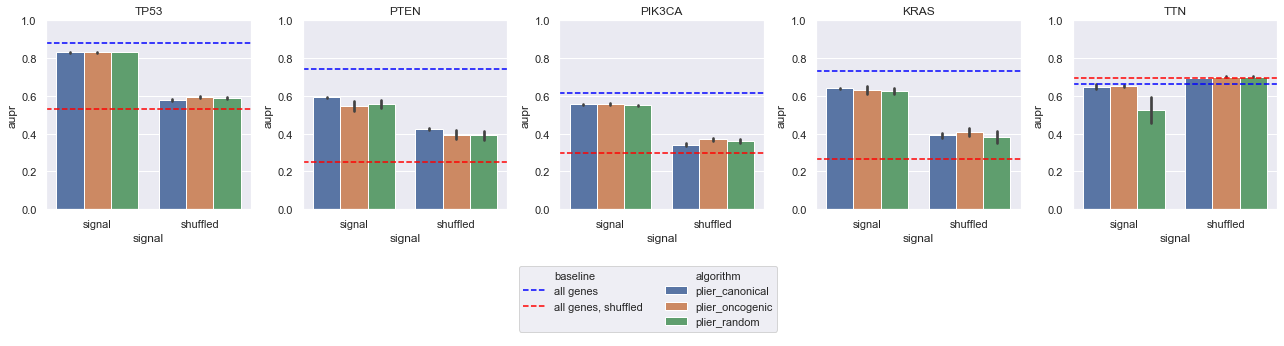

In [9]:
sns.set()
fig, axarr = plt.subplots(1, 5)
fig.set_figwidth(18)
fig.set_figheight(5)

z_dim = 100
prev_handles = handles

plier_df = df[df['algorithm'].str.contains('plier')]
with warnings.catch_warnings():
    # filter deprecation warning in scipy
    warnings.filterwarnings('ignore', category=FutureWarning)
    for g_ix, gene_name in enumerate(genes):
        ax = axarr[g_ix]
        gene_df = plier_df[(plier_df['gene_or_cancertype'] == gene_name) & 
                           (plier_df['z_dim'] == z_dim)]
        sns.barplot(data=gene_df, x='signal', y='aupr', hue='algorithm', ax=ax)
        raw_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                          (raw_df['signal'] == 'signal')]['aupr'].values[0]
        shuffled_aupr = raw_df[(raw_df['gene_or_cancertype'] == gene_name) &
                               (raw_df['signal'] == 'shuffled')]['aupr'].values[0]
        ax.axhline(y=raw_aupr, color='blue', linestyle='--', label='all genes')
        ax.axhline(y=shuffled_aupr, color='red', linestyle='--', label='all genes, shuffled')
        ax.set_ylim((0.0, 1.0))
        if g_ix == len(genes)-1:
            handles, labels = ax.get_legend_handles_labels()
        ax.get_legend().remove()
        ax.set_title(gene_name)
plt.tight_layout(h_pad=2)
fig.subplots_adjust(bottom=0.4)
labels.insert(0, 'baseline')
handles.insert(0, prev_handles[0])
labels.insert(3, '')
handles.insert(3, prev_handles[0])
labels.insert(4, 'algorithm')
handles.insert(4, prev_handles[0])
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.025), ncol=2)

## Plot reconstruction costs

In [10]:
pathway_dirs = ['canonical_pathways', 'oncogenic_pathways', 'random_pathways']
algs = ['pca', 'nmf', 'plier']
recon_df = None
for pw_dir in pathway_dirs:
    full_pw_dir = os.path.join(cfg.models_dir, pw_dir)
    for fname in os.listdir(full_pw_dir):
        if fname.startswith('.'): continue
        if 'reconstruction' not in fname: continue
        num_components = int(fname.split('_')[0])
        pw_df = pd.read_csv(os.path.join(full_pw_dir, fname), sep='\t')
        for alg in algs:
            if alg not in pw_df.columns: continue
            alg_name = (alg + '_' + pw_dir.split('_')[0] if alg == 'plier' else alg)
            algs_to_drop = (set(algs) - set([alg])).intersection(set(pw_df.columns.values))
            alg_df = (
                pw_df.copy()
                     .drop(columns=algs_to_drop)
                     .assign(algorithm=alg_name, z_dim=num_components)
                     .rename(columns={alg: 'reconstruction'})
            )
            if recon_df is None:
                recon_df = alg_df
            else:
                recon_df = pd.concat((recon_df, alg_df))
                
recon_df.reset_index(inplace=True)
recon_df.head()

,index,reconstruction,seed,shuffled,data_type,algorithm,z_dim
0,0,312.436339,121958,True,training,pca,200
1,1,311.915009,671155,True,training,pca,200
2,2,314.064708,131932,True,training,pca,200
3,3,309.703076,365838,True,training,pca,200
4,4,312.970575,259178,True,training,pca,200


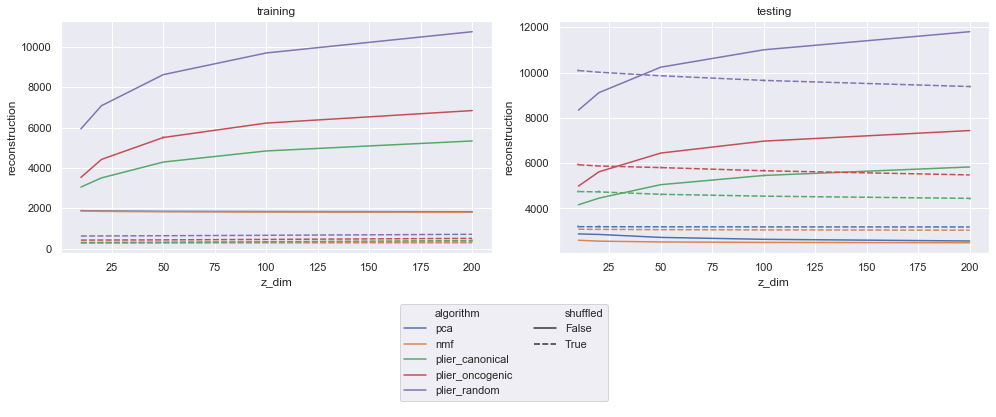

In [11]:
import warnings
fig, axarr = plt.subplots(1, 2)
fig.set_figwidth(14)
fig.set_figheight(6)

for ix, data_set in enumerate(['training', 'testing']):
    ax = axarr[ix]
    data_df = recon_df[recon_df['data_type'] == data_set]
    sns.set({'figure.figsize': (12, 8)})
    sns.lineplot(data=data_df, x='z_dim', y='reconstruction', hue='algorithm', 
                 style='shuffled', err_style='bars', ax=ax)
    ax.set_title(data_set)
    if ix == 1:
        handles, labels = ax.get_legend_handles_labels()
    ax.get_legend().remove()
plt.tight_layout()
fig.subplots_adjust(bottom=0.4)
labels.insert(9, '')
handles.insert(9, prev_handles[0])
labels.insert(10, '')
handles.insert(10, prev_handles[0])
labels.insert(11, '')
handles.insert(11, prev_handles[0])
plt.figlegend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, 0.025), ncol=2)